In [9]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas_datareader as web
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10, 8)

In [3]:
SP=web.DataReader('^GSPC', 'yahoo', start='2007-12-31')

In [4]:
SP.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-12-31,1475.829956,1465.130005,1475.250000,1468.359985,2440880000,1468.359985
2008-01-02,1471.770020,1442.069946,1467.969971,1447.160034,3452650000,1447.160034
2008-01-03,1456.800049,1443.729980,1447.550049,1447.160034,3429500000,1447.160034
2008-01-04,1444.010010,1411.189941,1444.010010,1411.630005,4166000000,1411.630005
2008-01-07,1423.869995,1403.449951,1414.069946,1416.180054,4221260000,1416.180054


In [5]:
Adclose= SP['Adj Close']
lretSP = np.log(1+Adclose.pct_change()).dropna()

In [6]:
lretSP.head()

Date
2008-01-02   -0.014543
2008-01-03    0.000000
2008-01-04   -0.024858
2008-01-07    0.003218
2008-01-08   -0.018523
Name: Adj Close, dtype: float64

In [7]:
lretSP.describe()

count    3521.000000
mean        0.000332
std         0.013050
min        -0.127652
25%        -0.003980
50%         0.000728
75%         0.005800
max         0.109572
Name: Adj Close, dtype: float64

In [8]:
(stats.skew(lretSP),stats.kurtosis(lretSP))

(-0.562800415251406, 13.290505941620282)

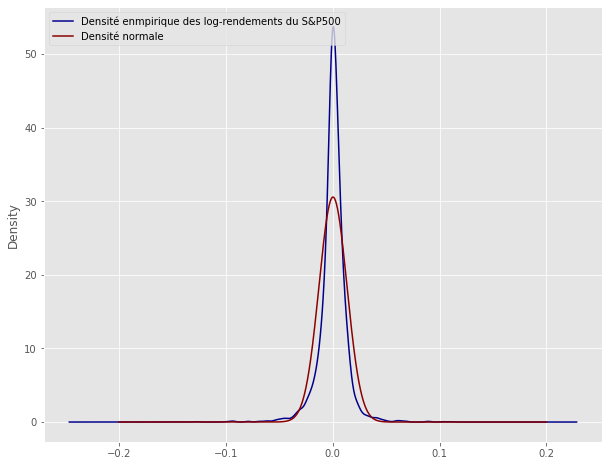

In [109]:
lretSP.plot(kind="kde", color="darkblue", label="Densité enmpirique des log-rendements du S&P500")
x = np.linspace(-0.2, 0.2, len(lretSP))
plt.plot(x, stats.norm.pdf(x, lretSP.mean(), lretSP.std()), color='darkred', label="Densité normale")
plt.legend(loc=2)


(-5.0, 5.0)

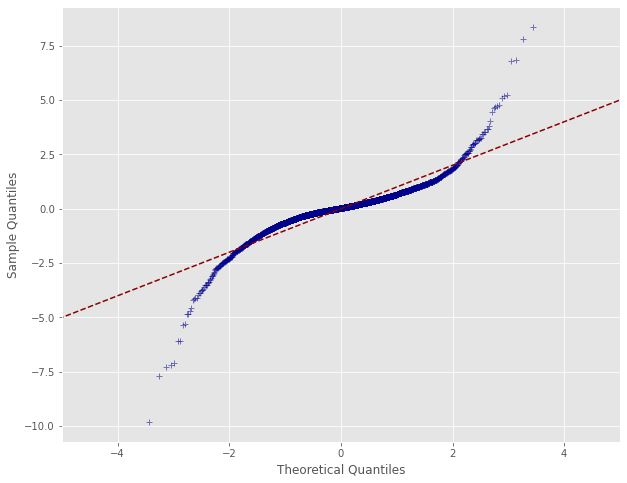

In [110]:
probSP = sm.ProbPlot(lretSP, fit=True)
qqSP = probSP.qqplot(marker='+', color='darkblue', alpha=0.5)
sm.qqline(qqSP.axes[0], line='45', color='darkred', linestyle='dashed')
plt.xlim((-5,5))


In [12]:
stats.shapiro(lretSP)

ShapiroResult(statistic=0.8529572486877441, pvalue=0.0)

In [13]:
stats.jarque_bera(lretSP)

Jarque_beraResult(statistic=26100.076415926902, pvalue=0.0)

In [14]:
stats.kstest(lretSP, 'norm')

KstestResult(statistic=0.47715673029322514, pvalue=0.0)

In [15]:
p = stats.t.fit(lretSP)
stats.kstest(lretSP, 't',args=p)

KstestResult(statistic=0.01946784995075107, pvalue=0.13681758829413526)

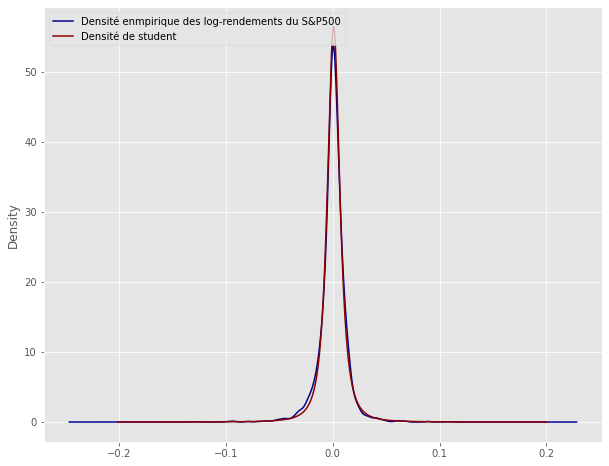

In [111]:
lretSP.plot(kind="kde", color="darkblue", label="Densité enmpirique des log-rendements du S&P500")
x = np.linspace(-0.2, 0.2, len(lretSP))
plt.plot(x, stats.t.pdf(x,*p), color='darkred', label="Densité de student")
plt.legend(loc=2)

In [17]:
DJ=web.DataReader('^DJI', 'yahoo', start='2007-12-31')

In [18]:
DJ.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-12-31,13364.730469,13246.530273,13364.160156,13264.820312,167240000,13264.820312
2008-01-02,13279.540039,12991.370117,13261.820312,13043.959961,239580000,13043.959961
2008-01-03,13137.929688,13023.559570,13044.120117,13056.719727,200620000,13056.719727
2008-01-04,13046.719727,12789.040039,13046.559570,12800.179688,304210000,12800.179688
2008-01-07,12884.150391,12733.839844,12801.150391,12827.490234,306700000,12827.490234


In [19]:
Adclosedj= DJ['Adj Close']
lretDJ = np.log(1+Adclosedj.pct_change()).dropna()

In [20]:
lretDJ.head()

Date
2008-01-02   -0.016790
2008-01-03    0.000978
2008-01-04   -0.019844
2008-01-07    0.002131
2008-01-08   -0.018762
Name: Adj Close, dtype: float64

In [21]:
lretDJ.describe()

count    3521.000000
mean        0.000283
std         0.012530
min        -0.138418
25%        -0.004022
50%         0.000597
75%         0.005534
max         0.107643
Name: Adj Close, dtype: float64

In [22]:
(stats.skew(lretDJ),stats.kurtosis(lretDJ))

(-0.4864519005485374, 15.68208189219466)

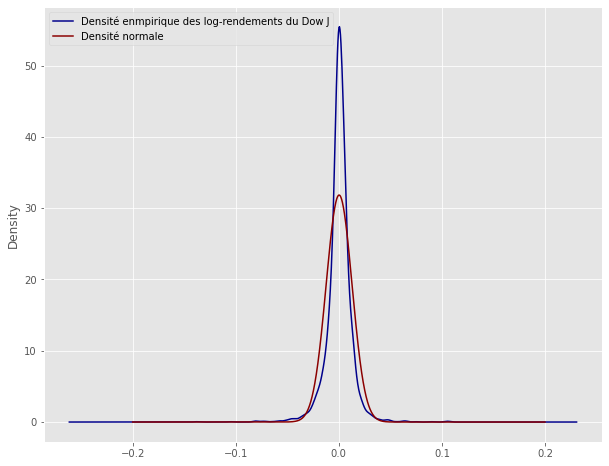

In [112]:
lretDJ.plot(kind="kde", color="darkblue", label="Densité enmpirique des log-rendements du Dow J")
x = np.linspace(-0.2, 0.2, len(lretDJ))
plt.plot(x, stats.norm.pdf(x, lretDJ.mean(), lretDJ.std()), color='darkred', label="Densité normale")
plt.legend(loc=2)

(-5.0, 5.0)

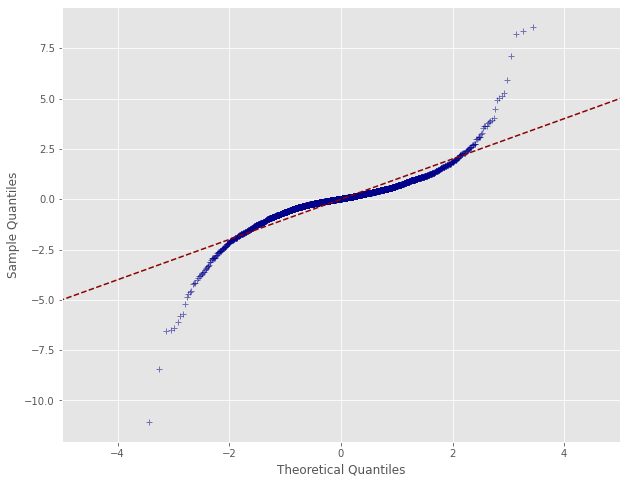

In [113]:
probDJ = sm.ProbPlot(lretDJ, fit=True)
qqDJ = probDJ.qqplot(marker='+', color='darkblue', alpha=0.5)
sm.qqline(qqDJ.axes[0], line='45', color='darkred', linestyle='dashed')
plt.xlim((-5,5))

In [24]:
stats.shapiro(lretDJ)

ShapiroResult(statistic=0.8494016528129578, pvalue=0.0)

In [25]:
stats.kstest(lretDJ, 'norm')

KstestResult(statistic=0.47848073222432486, pvalue=0.0)

In [26]:
stats.jarque_bera(lretDJ)

Jarque_beraResult(statistic=36218.50745411601, pvalue=0.0)

In [30]:
pdj = stats.t.fit(lretDJ)
stats.kstest(lretDJ, 't',args=pdj)

KstestResult(statistic=0.01955681975242314, pvalue=0.13350772992447968)

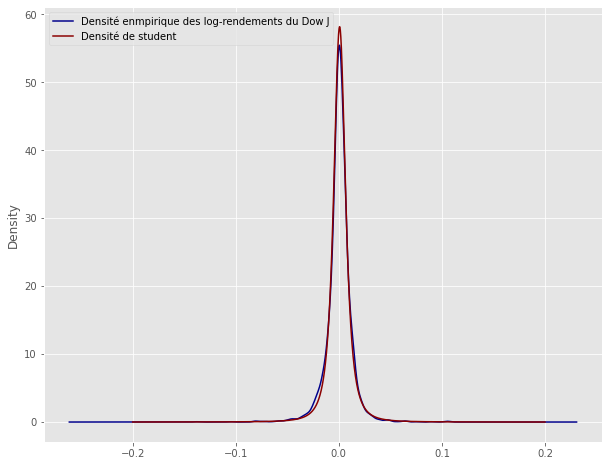

In [114]:
lretDJ.plot(kind="kde", color="darkblue", label="Densité enmpirique des log-rendements du Dow J")
x = np.linspace(-0.2, 0.2, len(lretDJ))
plt.plot(x, stats.t.pdf(x,*pdj), color='darkred', label="Densité de student")
plt.legend(loc=2)

In [34]:
lrets = pd.concat([lretSP, lretDJ], axis=1)
lrets.columns = ['lretSP','lretDJ']
lrets

,lretSP,lretDJ
Date,,
2008-01-02,-0.014543,-0.016790
2008-01-03,0.000000,0.000978
2008-01-04,-0.024858,-0.019844
2008-01-07,0.003218,0.002131
2008-01-08,-0.018523,-0.018762
...,...,...
2021-12-17,-0.010341,-0.014936
2021-12-20,-0.011453,-0.012327
2021-12-21,0.017622,0.015919


In [35]:
correlation=lrets.corr()
correlation

,lretSP,lretDJ
lretSP,1.000000,0.976739
lretDJ,0.976739,1.000000


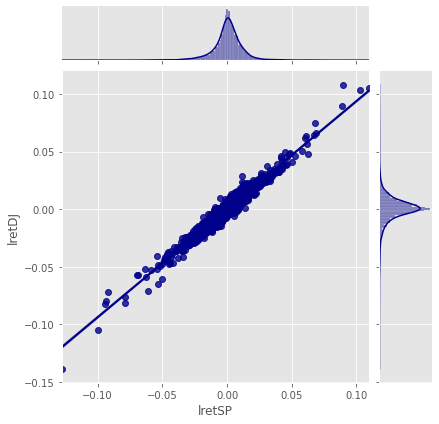

In [115]:
sns.jointplot(data=lrets, x="lretSP", y="lretDJ",color='darkblue',kind='reg')

Text(0, 0.5, 'log-rendements de Dow J')

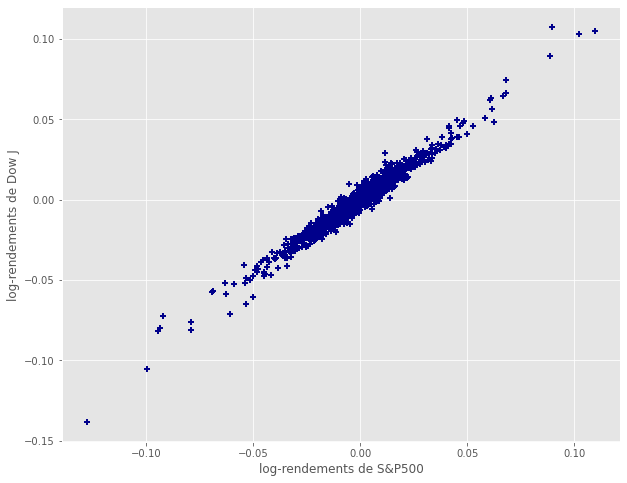

In [38]:
plt.scatter(lretSP, lretDJ,marker="+",linewidths=2,c='darkblue')
plt.xlabel("log-rendements de S&P500")
plt.ylabel("log-rendements de Dow J")

In [39]:
from statsmodels.distributions.empirical_distribution import ECDF
F_n= ECDF (lretSP)
G_n= ECDF (lretDJ)
n=lretSP.shape[0]
Fi=(n * F_n(lretSP) -1)/(n-1)
Gi=(n * G_n(lretDJ) -1)/(n-1)

Saving figure : rank rank


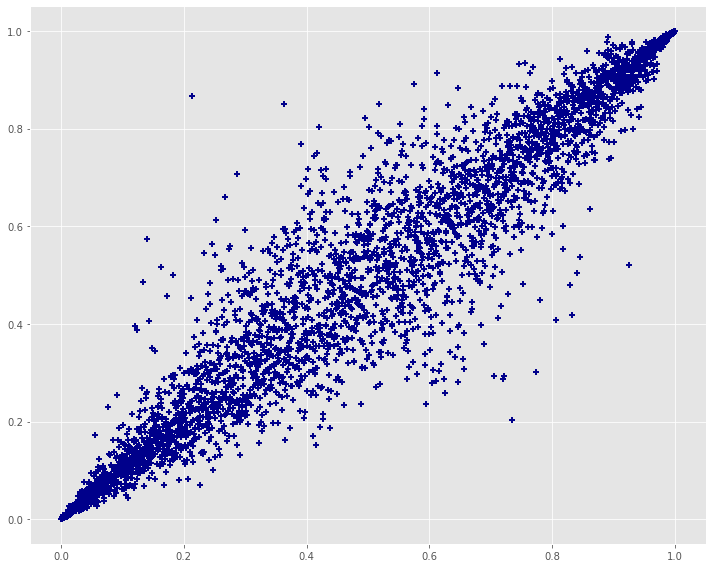

In [41]:
plt.scatter(Fi,Gi,marker='+',linewidths=2,c='darkblue')

In [116]:
from rpy2.robjects.packages import importr, data
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri
from rpy2.robjects.vectors import FloatVector
import rpy2.robjects.numpy2ri as rpyn
base = importr('base')
vinecopula = importr('VineCopula')
MASS = importr('MASS')
plotly = importr('plotly')
lcopula= importr('lcopula')

In [68]:
X_1 = FloatVector(lretSP.values)
X_2 = FloatVector(lretDJ.values)
dataret=base.cbind(X_1,X_2)

In [44]:
def joinEcdf(X, Y, x, y):
    if X.shape[0] != Y.shape[0]:
        return 0.
    n= X.shape[0]
    values = np.array([sum((X <= i) & (Y <= j)) / n for i, j in zip(x, y)])    
    return values

In [45]:
n = lretDJ.shape[0]
Hi= (n * joinEcdf(lretSP, lretDJ, lretSP, lretDJ) - 1)/ (n-1)

In [46]:
khi_i = (Hi - Fi * Gi)/(np.sqrt(Fi * (1 - Fi) * Gi * (1-Gi)))

In [47]:
def sign(x):
    return np.array([1 * (i >= 0) - 1 * (i < 0) for i in x])

In [48]:
lambda_i = 4 * sign((Fi - 0.5) * (Gi - 0.5)) * np.maximum((Fi - 0.5)**2 , (Gi - 0.5)**2)

In [49]:
lambdacond = lambda_i[abs(lambda_i < 4 * (1/(n-1) - 0.5)**2)]

In [50]:
khicond = khi_i[abs(lambda_i < 4 * (1/(n-1) - 0.5)**2)]

Saving figure : khi plot


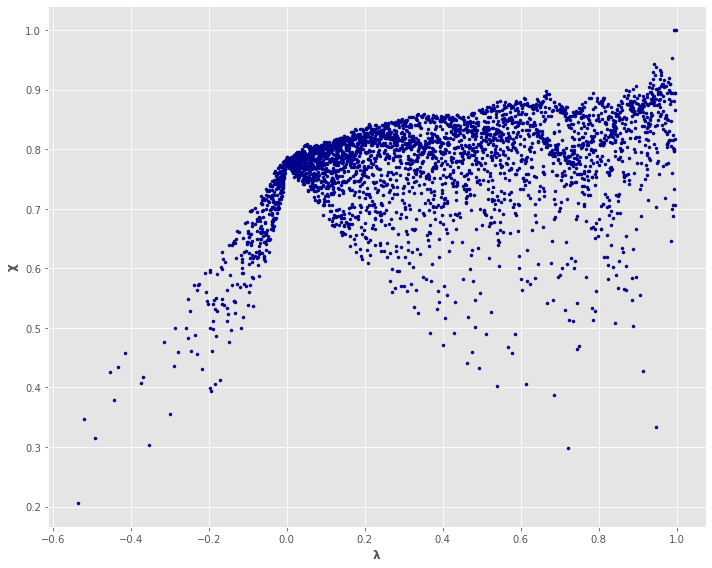

In [52]:
plt.scatter(lambdacond, khicond, marker='.',c='darkblue')
plt.xlabel(r'$\mathbf{\lambda}$')
plt.ylabel(r'$\mathbf{\chi}$')
save_fig('khi plot')

In [45]:
Kplot=lcopula.K_plot(dataret)

In [53]:
A = 0
for j in np.arange(2, n):
    for i in np.arange(1, j):
        A = A + np.array(sum(sign(np.array([(lretSP[j] - lretSP[i])*(lretDJ[j] - lretDJ[i])]))))

In [54]:
Kentaux = 2/(n * (n - 1)) * A

In [55]:
Kentaux

0.8198294002220443

In [60]:
stats.kendalltau(lretSP, lretDJ)

KendalltauResult(correlation=0.8203696071524234, pvalue=0.0)

In [56]:
#Gumbel théta
thetaG = 1/ (1 - Kentaux)

#Gumbel upper tail dependence
lambdaUG = 2 - 2**(1 / thetaG)
(thetaG,lambdaUG)

(5.550295116031203, 0.8669821424083246)

In [57]:
#Clayton théta 
thetaC = 2 * Kentaux / (1 - Kentaux)
#Clayton lower tail 
lambdaLC = 2 ** (-1 / thetaC)
(thetaC, lambdaLC)

(9.100590232062405, 0.9266632206236455)

In [70]:
pX_1 = vinecopula.pobs(X_1)
pX_2 = vinecopula.pobs(X_2)
fitfrankcopula = vinecopula.BiCopSelect(pX_1, pX_2, familyset = 5, indeptest = False, level = 0.05)
base.summary(fitfrankcopula) 

Family
------ 
No:    5
Name:  Frank

Parameter(s)
------------
par:  19.73

Dependence measures
-------------------
Kendall's tau:    0.81 (empirical = 0.82, p value < 0.01)
Upper TD:         0 
Lower TD:         0 

Fit statistics
--------------
logLik:  4024.13 
AIC:    -8046.25 
BIC:    -8040.08 



<rpy2.robjects.vectors.ListVector object at 0x0000020483205D80> [RTYPES.VECSXP]
R classes: ('BiCop',)
[FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp...]
  family: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x0000020483205D00> [RTYPES.REALSXP]
R classes: ('numeric',)
[5.000000]
  par: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x0000020483210280> [RTYPES.REALSXP]
R classes: ('numeric',)
[19.728823]
  par2: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x0000020483210CC0> [RTYPES.REALSXP]
R classes: ('numeric',)
[0.000000]
  npars: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x0000020483BD8B40> [RTYPES.REALSXP]
R classes: ('numeric',)
[1.000000]
...
  tau: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x0000020484AD06C0> [RTYPES.REALSXP]
R classes: ('numeric',)
[-8046.250880]
  beta: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x0000020484AD0240> [RTYPES.REALSXP]
R classes: ('numeric',)
[-8040.084380]
  taildep: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x0000020484AD0700> [RTYPES.REALSXP]
R classes: ('numeric',)
[0.820370]
  call: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x0000020483237AC0> [RTYPES.REALSXP]
R classes: ('numeric',)
[0.000000]

In [91]:
#Frank theta 
thetaF =np.array(fitfrankcopula[1])
thetaF[0]


19.728823030813437

In [58]:
#Clayton Copula
def ClaytonCopula(u, v, k):
    thetaC = 2 * k / (1 - k)
    Copula = (u**(- thetaC) + v**(- thetaC) - 1) ** (- 1 / thetaC)
    return Copula
    

In [59]:
#Gumbel Copula
def GumbelCopula(u, v, k):
    thetaG = 1/ (1 - k)
    Copula = np.exp(- ( (- np.log(u))**thetaG + (- np.log(v))**thetaG)**(1 / thetaG))
    return Copula

In [104]:
#Frank Copula
def FrankCopula(u, v):
    Copula = - (1/(thetaF)) * np.log(1 + ((np.exp(- thetaF *u) - 1)*(np.exp(- thetaF * v) - 1))/(np.exp(- thetaF) - 1))
    return Copula

In [60]:
Ri = n * F_n(lretSP)
Si = n * G_n(lretDJ)

In [61]:
#indicatrice de Deheuvels
def indicatricedev(u, v):
    value = sum([((r / n) <= u) & ( (s/n) <= v) for r, s in zip(Ri, Si)])   
    return value

In [62]:
#Copule de Deheuvels
def DeheuvelsCopula(u, v):
    Copula = (1 / n) * indicatricedev(u, v)
    return Copula

In [105]:
#statistique de Cramer Von Mises
def disCrVM(Copule):
    if Copule == 'Gumbel':
        value = sum((GumbelCopula(Ri / (n + 1), Si / (n + 1), Kentaux)- DeheuvelsCopula(Ri / (n + 1), Si / (n + 1)))**2)
    if Copule == 'Clayton':
        value = sum((ClaytonCopula(Ri / (n + 1), Si / (n + 1), Kentaux)- DeheuvelsCopula(Ri / (n + 1), Si / (n + 1)))**2)
    if Copule == 'Frank':
        value = sum((FrankCopula(Ri / (n + 1), Si / (n + 1))- DeheuvelsCopula(Ri / (n + 1), Si / (n + 1)))**2)
    return value

In [107]:
#statistique de Kolmogorov-Smirnov
def disKoSm(Copule):
    if Copule == 'Gumbel':
        value = max(np.abs(GumbelCopula(Ri / (n + 1), Si / (n + 1), Kentaux)- DeheuvelsCopula(Ri / (n + 1), Si / (n + 1))))
    if Copule == 'Clayton':
        value = max(np.abs(ClaytonCopula(Ri / (n + 1), Si / (n + 1), Kentaux)- DeheuvelsCopula(Ri / (n + 1), Si / (n + 1))))
    if Copule == 'Frank':
        value = max(np.abs(FrankCopula(Ri / (n + 1), Si / (n + 1))- DeheuvelsCopula(Ri / (n + 1), Si / (n + 1))))
    return value

In [106]:
(disCrVM('Gumbel'), disCrVM('Clayton'), disCrVM('Frank'))

(0.19052678187584265, 0.6766133309714899, 0.41636366692346394)

In [108]:
(disKoSm('Gumbel'),disKoSm('Clayton'), disKoSm('Frank'))

(0.017400052775977157, 0.03358842394798156, 0.022100739981012613)